In [ ]:
import Pkg
Pkg.add("Revise")
Pkg.add("IonSim")
Pkg.add("QuantumOptics")
Pkg.add("StochasticDiffEq")
Pkg.add("DSP")
using PyPlot
using Revise
using IonSim
using QuantumOptics: timeevolution, stochastic, Basis

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: pkg.julialang.org", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry C:\Users\jewoo\.julia\juliaup\julia-1.11.6+0.x64.w64.mingw32\share\julia\stdlib\v1.11\Pkg\src\Registry\Registry.jl:77
    Updating registry at `C:\Users\jewoo\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.juli

In [ ]:
C = Ca40([("S1/2", -1/2, "g"),("D5/2", -1/2, "e")])
# Create aliases for the qubit states for easier access
#set_sublevel_alias!(C, Dict("g" => ("S1/2", -1/2), "e" => ("D5/2", -1/2)))

# Define the trap configuration. We'll model a single ion in a linear chain
# with a 1 MHz axial motional frequency.
chain = LinearChain(
    ions=[C],
    comfrequencies=(x=3e6, y=3e6, z=1e6),   
    selectedmodes=(;z=[1]) # We only consider the axial mode of motion
)

# Define the laser that will drive the transition
L = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L]
)

polarization!(L, (x̂ - ẑ)/√2)
wavevector!(L, (x̂ + ẑ)/√2);
wavelength_from_transition!(L, C, ("g", "e"), T)
intensity_from_pitime!(L, 4e-6, C, ("g", "e"), T);

ion = ions(T)[1]

ψ0_ion_1 = ion["g"]
ψ0_ion_2 = ion[("S1/2", -1/2)]
ψ0_ion_3 = ionstate(ion, "g")

print(ψ0_ion_1)
mode = modes(T)[1]

ψ0_mode_1 = mode[0]
ψ0_mode_2 = fockstate(mode, 0)
ψ0_mode_3 = groundstate(mode)

print(ψ0_mode_1)
ψ₀ = ion["g"] ⊗ mode[0];

Ket(dim=2)
  basis: ⁴⁰Ca
 1.0 + 0.0im
 0.0 + 0.0imKet(dim=11)
  basis: VibrationalMode(ν=1.0e6, axis=ẑ, N=10)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [ ]:
function pulse(T:: Chamber , tspan, pitime)
    # Define the laser that will drive the transition
    L = T.lasers[1]

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    
    pi2_time = pitime*1e6/2

    res_intensity = intensity_from_pitime(L, pitime, T.iontrap.ions[1], ("g", "e"), T)

    function intensity_funtion(t)
    if(t<=pi2_time)
        return res_intensity
    elseif(t>=tspan[end] - pi2_time)
        return res_intensity
    else
        return 0.0
    end

    end
    intensity!(L, intensity_funtion)

    function phase_funtion(t)
        if(t<=pi2_time)
            return 2*pi
        elseif(t>=tspan[end] - pi2_time)
            return pi
        else
            return 0.0
        end
    end

    phase!(L, phase_funtion)
    h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
    return h
end


function experiment(T::Chamber, wait_time)
    pitime = 4e-6
    tspan = 0: 0.1: wait_time+4

    h = pulse(T, tspan, pitime)
    return h
end

# phase!(L, phase_funtion)
# h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

experiment (generic function with 1 method)

λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 10000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 20000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π


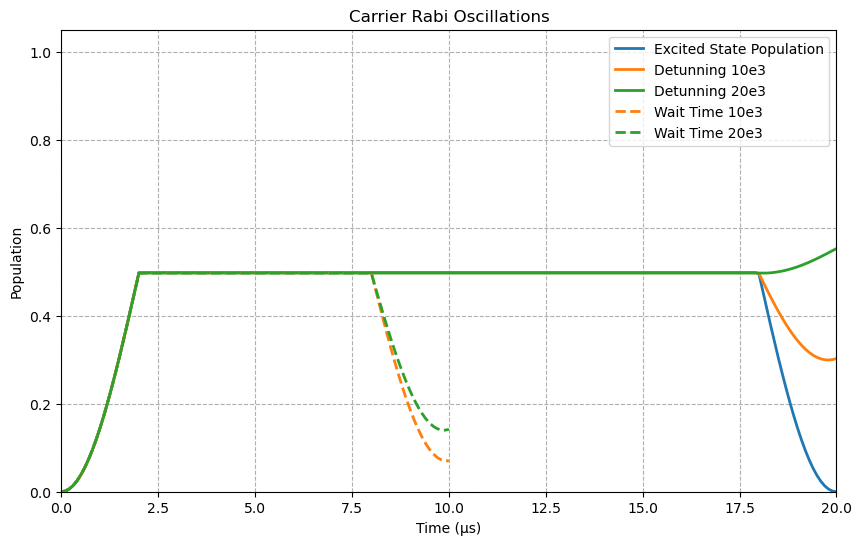

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


In [ ]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
#h = pulse(T, tspan, 4e-6)
h = experiment(T, 16)
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)
print(L)



L1 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T1 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L1]
)
polarization!(L1, (x̂ - ẑ)/√2)
wavevector!(L1, (x̂ + ẑ)/√2);
wavelength_from_transition!(L1, C, ("g", "e"), T1)
detuning!(L1, 10000)
#h1 = pulse(T1, tspan, 4e-6)
h1 = experiment(T1, 16)
tspan1 = 0:0.1:10
#h1_wait = pulse(T1, tspan1, 4e-6)
h1_wait = experiment(T1, 6)
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
excited_pop1 = expect(ionprojector(T1, "e"), sol1)

tout1_wait, sol1_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h1_wait)
excited_pop1_wait = expect(ionprojector(T1, "e"), sol1_wait)
print(L1)


L2 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T2 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    δB = 1e-6,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L2]
)
polarization!(L2, (x̂ - ẑ)/√2)
wavevector!(L2, (x̂ + ẑ)/√2);
wavelength_from_transition!(L2, C, ("g", "e"), T2)detuning!(L2, 20000)

#h2 = pulse(T2, tspan, 4e-6)
h2 = experiment(T2, 16)
h2_wait = experiment(T2, 6)
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)

excited_pop2 = expect(ionprojector(T2, "e"), sol2)

tout2_wait, sol2_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h2_wait)
excited_pop2_wait = expect(ionprojector(T2, "e"), sol2_wait)

print(L2)



# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 10e3", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 20e3", color="C2", linewidth=2)


plot(tout1_wait, real.(excited_pop1_wait), label="Wait Time 10e3", color="C1", linestyle="--", linewidth=2)
plot(tout2_wait, real.(excited_pop2_wait), label="Wait Time 20e3", color="C2", linestyle="--", linewidth=2)


xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())


λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 10000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 20000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π


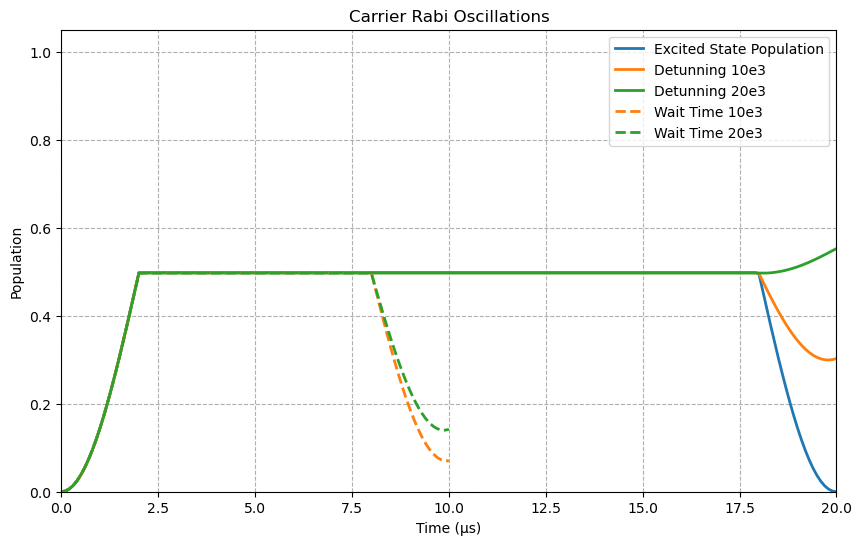

In [ ]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
#h = pulse(T, tspan, 4e-6)
h = experiment(T, 16)
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)
print(L)



L1 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T1 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L1]
)
polarization!(L1, (x̂ - ẑ)/√2)
wavevector!(L1, (x̂ + ẑ)/√2);
wavelength_from_transition!(L1, C, ("g", "e"), T1)
detuning!(L1, 10000)
#h1 = pulse(T1, tspan, 4e-6)
h1 = experiment(T1, 16)
tspan1 = 0:0.1:10
#h1_wait = pulse(T1, tspan1, 4e-6)
h1_wait = experiment(T1, 6)
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
excited_pop1 = expect(ionprojector(T1, "e"), sol1)

tout1_wait, sol1_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h1_wait)
excited_pop1_wait = expect(ionprojector(T1, "e"), sol1_wait)
print(L1)


L2 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T2 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    δB = 1e-6,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L2]
)
polarization!(L2, (x̂ - ẑ)/√2)
wavevector!(L2, (x̂ + ẑ)/√2);
wavelength_from_transition!(L2, C, ("g", "e"), T2)detuning!(L2, 20000)

#h2 = pulse(T2, tspan, 4e-6)
h2 = experiment(T2, 16)
h2_wait = experiment(T2, 6)
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)

excited_pop2 = expect(ionprojector(T2, "e"), sol2)

tout2_wait, sol2_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h2_wait)
excited_pop2_wait = expect(ionprojector(T2, "e"), sol2_wait)

print(L2)



# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 10e3", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 20e3", color="C2", linewidth=2)


plot(tout1_wait, real.(excited_pop1_wait), label="Wait Time 10e3", color="C1", linestyle="--", linewidth=2)
plot(tout2_wait, real.(excited_pop2_wait), label="Wait Time 20e3", color="C2", linestyle="--", linewidth=2)


xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())


In [ ]:
function pulse(T:: Chamber , tspan, pitime, del_intensity)
    # Define the laser that will drive the transition
    L = T.lasers[1]

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    
    pi2_time = pitime*1e6/2

    res_intensity = intensity_from_pitime(L, pitime, T.iontrap.ions[1], ("g", "e"), T)

    function intensity_funtion(t)
    if(t<=pi2_time)
        return res_intensity + del_intensity
    elseif(t>=tspan[end] - pi2_time)
        return res_intensity + del_intensity
    else
        return 0.0
    end

    end
    intensity!(L, intensity_funtion)
    # print(L)

    # function phase_funtion(t)
    #     if(t<=pi2_time)
    #         return 2*pi
    #     elseif(t>=tspan[end] - pi2_time)
    #         return 2*pi
    #     else
    #         return 0.0
    #     end
    # end

    # phase!(L, phase_funtion)
    h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
    return h
end


function experiment(T::Chamber, wait_time, del_intensity)
    pitime = 4e-6
    tspan = 0: 0.1: wait_time+4

    h = pulse(T, tspan, pitime, del_intensity)
    return h
end

# phase!(L, phase_funtion)
# h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

experiment (generic function with 2 methods)

In [ ]:
function apply_laser(T:: Chamber , tspan, pitime, del_intensity)
    # Define the laser that will drive the transition
    L = T.lasers[1]

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    
    pi2_time = pitime*1e6/2

    res_intensity = intensity_from_pitime(L, pitime, T.iontrap.ions[1], ("g", "e"), T)

    
    intensity!(L, del_intensity)
    # print(L)

    # function phase_funtion(t)
    #     if(t<=pi2_time)
    #         return 2*pi
    #     elseif(t>=tspan[end] - pi2_time)
    #         return 2*pi
    #     else
    #         return 0.0
    #     end
    # end

    # phase!(L, phase_funtion)
    h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
    return h
end


apply_laser (generic function with 1 method)

λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 4.030939867952202e6 W/m²
ϕ(t=0): 0.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 5.0309398679522015e6 W/m²
ϕ(t=0): 0.0 ⋅ 2π


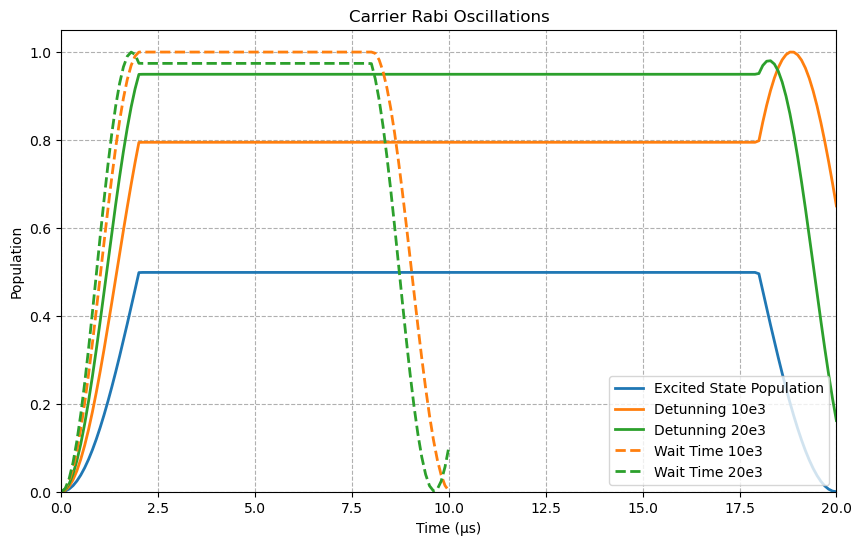

In [ ]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
#h = pulse(T, tspan, 4e-6)
h = experiment(T, 16)
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)
print(L)



L1 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T1 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L1]
)
polarization!(L1, (x̂ - ẑ)/√2)
wavevector!(L1, (x̂ + ẑ)/√2);
wavelength_from_transition!(L1, C, ("g", "e"), T1)
#h1 = pulse(T1, tspan, 4e-6)
h1 = experiment(T1, 16, 1e6)
tspan1 = 0:0.1:10
#h1_wait = pulse(T1, tspan1, 4e-6)
h1_wait = experiment(T1, 6, 3e6)
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
excited_pop1 = expect(ionprojector(T1, "e"), sol1)

tout1_wait, sol1_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h1_wait)
excited_pop1_wait = expect(ionprojector(T1, "e"), sol1_wait)
print(L1)


L2 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T2 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    δB = 1e-6,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L2]
)
polarization!(L2, (x̂ - ẑ)/√2)
wavevector!(L2, (x̂ + ẑ)/√2);
wavelength_from_transition!(L2, C, ("g", "e"), T2)

#h2 = pulse(T2, tspan, 4e-6)
h2 = experiment(T2, 16, 2e6)
h2_wait = experiment(T2, 6, 4e6)
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)

excited_pop2 = expect(ionprojector(T2, "e"), sol2)

tout2_wait, sol2_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h2_wait)
excited_pop2_wait = expect(ionprojector(T2, "e"), sol2_wait)

print(L2)



# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 10e3", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 20e3", color="C2", linewidth=2)


plot(tout1_wait, real.(excited_pop1_wait), label="Wait Time 10e3", color="C1", linestyle="--", linewidth=2)
plot(tout2_wait, real.(excited_pop2_wait), label="Wait Time 20e3", color="C2", linestyle="--", linewidth=2)


xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())


In [ ]:
function detuning_intensity(L::Laser, del_intensity, cnt)
    L1 = Laser()

    T1 = Chamber(
        iontrap=chain,
        B=0.37e-3,              # Magnetic field in Tesla
        #δB = 0.1,
        Bhat=ẑ,              # Magnetic field direction
        lasers=[L1]
    )
    polarization!(L1, (x̂ - ẑ)/√2)
    wavevector!(L1, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L1, C, ("g", "e"), T1)
    h1 = apply_laser(T1, 16, del_intensity)
    tspan1 = 0:0.1:10
    h1_wait = experiment(T1, 6, 3e6)
    tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
    excited_pop1 = expect(ionprojector(T1, "e"), sol1)
    plot(tout1, real.(excited_pop1), label="Detunning intensity $del_intensity", color = "C$cnt", linewidth=2)

end

detuning_intensity (generic function with 1 method)

In [ ]:
figure(figsize=(10, 6))


for i in 1:3:20
    detuning_intensity(L, i*1e6, i)
end

xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())

MethodError: MethodError: no method matching apply_laser(::Chamber, ::Int64, ::Float64)
The function `apply_laser` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  apply_laser(::Chamber, ::Any, ::Any, !Matched::Any)
   @ Main c:\Users\jewoo\Desktop\SQRLab\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X21sZmlsZQ==.jl:1


In [ ]:
Pkg.add("ProgressMeter")
using Distributions # You'll need to add this package!
using ProgressMeter # For a nice progress bar

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


In [ ]:

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
I_rms_1 = 1e-6  # (T) The final shielded noise from the paperI
I_rms_2 = 2e-6 # (T) Example for 20 dB worse noise
I_rms_3 = 3e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution_1 = Normal(0, I_rms_1)
noise_distribution_2 = Normal(0, I_rms_2)
noise_distribution_3 = Normal(0, I_rms_3)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_shot(t_wait, del_intensity)
    # The Chamber is now inside the function, as δB changes each time
    L1 = Laser()

    T1 = Chamber(
        iontrap=chain,
        B=0.37e-3,              # Magnetic field in Tesla
        #δB = 0.1,
        Bhat=ẑ,              # Magnetic field direction
        lasers=[L1]
    )
    polarization!(L1, (x̂ - ẑ)/√2)
    wavevector!(L1, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L1, C, ("g", "e"), T1)
    h1 = experiment(T1, 16, del_intensity)
    tspan = 0:0.1:t_wait*1e6
    h1_wait = experiment(T1, 6, 3e6)
    tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
    excited_pop1 = expect(ionprojector(T1, "e"), sol1)

    return excited_pop1[end]
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence(noise_distribution)
    t = 16e-6 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    # @showprogress "Simulating Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = rand(noise_distribution)
            final_pops_for_t[i] = run_shot(t+8e-7, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        # println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    # end
    return t, avg_g_population
end



simulate_decoherence (generic function with 1 method)

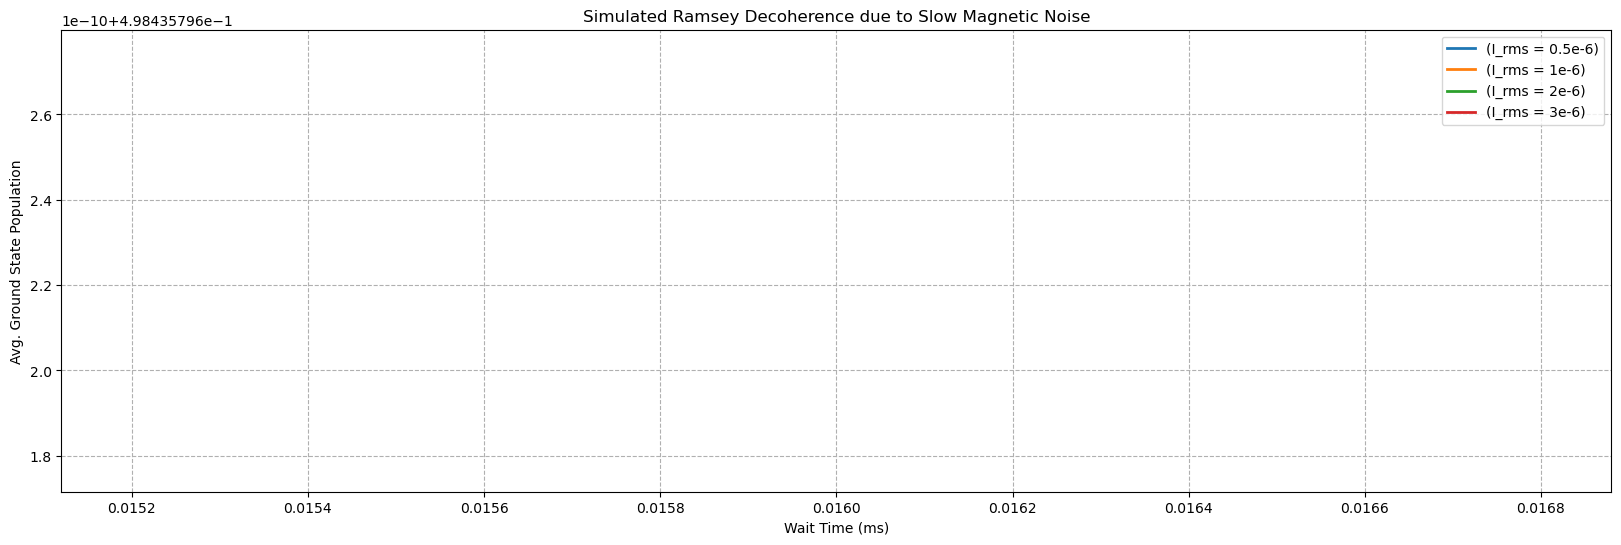

Running simulation with various noise (B_rms = 1e-6, 2e-6, 3e-6)


In [ ]:
const N_shots = 200  # Number of experiments to average over. More is better.
B_rms_0 = 0.5e-6  # (T) The unshielded noise from the paper
B_rms_1 = 1e-6  # (T) The final shielded noise from the paper
B_rms_2 = 2e-6 # (T) Example for 20 dB worse noise
B_rms_3 = 3e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution_0 = Normal(0, B_rms_0)
noise_distribution_1 = Normal(0, B_rms_1)
noise_distribution_2 = Normal(0, B_rms_2)
noise_distribution_3 = Normal(0, B_rms_3)

# --- 5. Run and Plot ---
println("Running simulation with various noise (B_rms = 1e-6, 2e-6, 3e-6)")
times_0, pops_0 = simulate_decoherence(noise_distribution_0)
times_1, pops_1 = simulate_decoherence(noise_distribution_1)
times_2, pops_2 = simulate_decoherence(noise_distribution_2)
times_3, pops_3 = simulate_decoherence(noise_distribution_3)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
# times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(20, 6))
plot(times_0 * 1e3, pops_0, label="(I_rms = 0.5e-6)", linewidth=2)
plot(times_1 * 1e3, pops_1, label="(I_rms = 1e-6)", linewidth=2)
plot(times_2 * 1e3, pops_2, label="(I_rms = 2e-6)", linewidth=2)
plot(times_3 * 1e3, pops_3, label="(I_rms = 3e-6)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())